# **AMAZON BEST-SELLER ANALYSIS**

**SETTING UP THE DATASET**

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
bst = pd.read_csv('bestseller.csv')
bst

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


**DATA CLEANING AND TRANSFORMATION**

1. Is there any missing data?

In [3]:
bst.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

2. Are there any duplicate

In [4]:
bst.duplicated().sum()

0

**DATA VISUALISATION**

3. Create a plot showing the top 10 authors by rating

In [5]:
authors_rating = bst.pivot_table(index='Author', values='User Rating', aggfunc='mean')
sorted_rating = authors_rating.sort_values(by='User Rating', ascending=False)
sorted_rating.head(10)

,User Rating
Author,
Patrick Thorpe,4.9
Lin-Manuel Miranda,4.9
Chip Gaines,4.9
Sherri Duskey Rinker,4.9
Nathan W. Pyle,4.9
Pete Souza,4.9
Sarah Young,4.9
Bill Martin Jr.,4.9
Dav Pilkey,4.9


4. Create a pie chart showing the distribution of book genre.

In [6]:
genre_count = bst['Genre'].value_counts()
genre_count

Non Fiction    310
Fiction        240
Name: Genre, dtype: int64

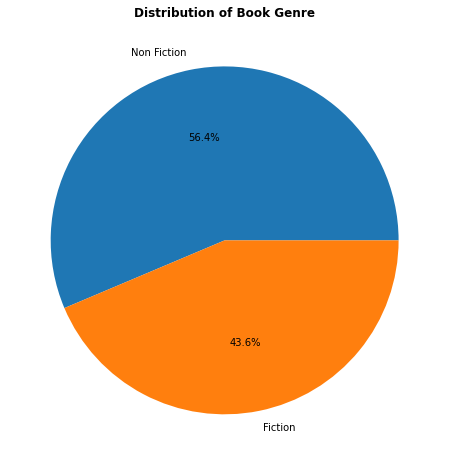

In [7]:
fig = plt.figure(figsize=(10,8))
plt.pie(genre_count, labels=genre_count.index, autopct='%1.1f%%')

plt.title('Distribution of Book Genre', weight='bold')
plt.show()

5. Create a plot showing the top 5 books by number of reviews.

In [8]:
books_review = bst.pivot_table(index='Name', values='Reviews')
review_sort = books_review.sort_values(by='Reviews', ascending=False)
top5_books = review_sort.head(5)
top5_books

,Reviews
Name,
Where the Crawdads Sing,87841.0
The Girl on the Train,79446.0
Becoming,61133.0
Gone Girl,57271.0
The Fault in Our Stars,50482.0


<Figure size 720x576 with 0 Axes>

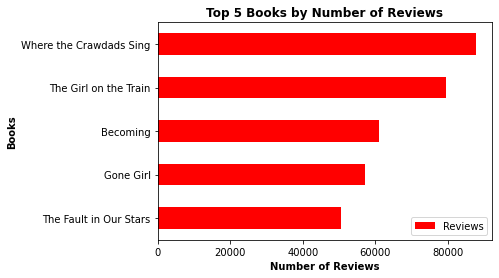

In [9]:
top5_books = top5_books[::-1]
plt.figure(figsize=(10,8))

top5_books.plot(kind='barh', color='red')
plt.xlabel('Number of Reviews', weight='bold')
plt.ylabel('Books', weight='bold')
plt.title('Top 5 Books by Number of Reviews', weight='bold')
plt.show()

6. Are there any outliers?

In [10]:
# Compute z-score for each numerical column
z_score = pd.DataFrame(np.abs((bst.select_dtypes(include=np.number) - bst.select_dtypes(include=np.number).mean()) / bst.select_dtypes(include=np.number).std()))

# Set a threshold for outlier detection (e.g., z-score greater than 3)
threshold = 3

# Identify outliers by checking which Z-scores exceed the threshold
outliers = bst[z_score > threshold].dropna(how='all')
outliers

,Name,Author,User Rating,Reviews,Price,Year,Genre
22,NaN,NaN,3.9,NaN,NaN,NaN,NaN
32,NaN,NaN,NaN,61133.0,NaN,NaN,NaN
33,NaN,NaN,NaN,61133.0,NaN,NaN,NaN
69,NaN,NaN,NaN,NaN,105.0,NaN,NaN
70,NaN,NaN,NaN,NaN,105.0,NaN,NaN
106,NaN,NaN,3.8,47265.0,NaN,NaN,NaN
107,NaN,NaN,3.8,47265.0,NaN,NaN,NaN
132,NaN,NaN,3.6,NaN,NaN,NaN,NaN
135,NaN,NaN,NaN,57271.0,NaN,NaN,NaN
136,NaN,NaN,NaN,57271.0,NaN,NaN,NaN


In [11]:
# Selecting only numerical columns
columns_to_plot = ['Price', 'Reviews', 'User Rating']
numeric_columns = bst[columns_to_plot]

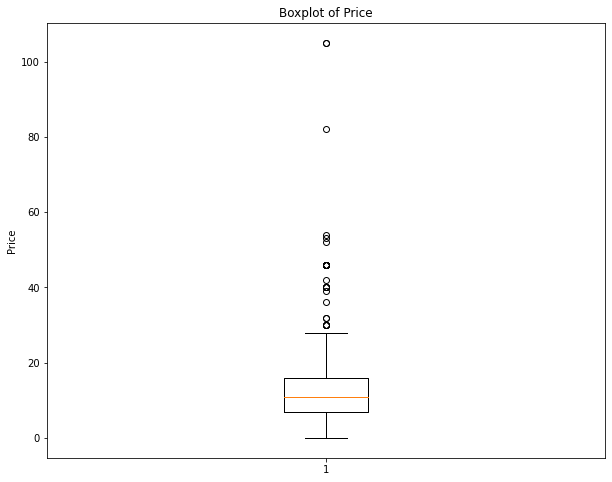

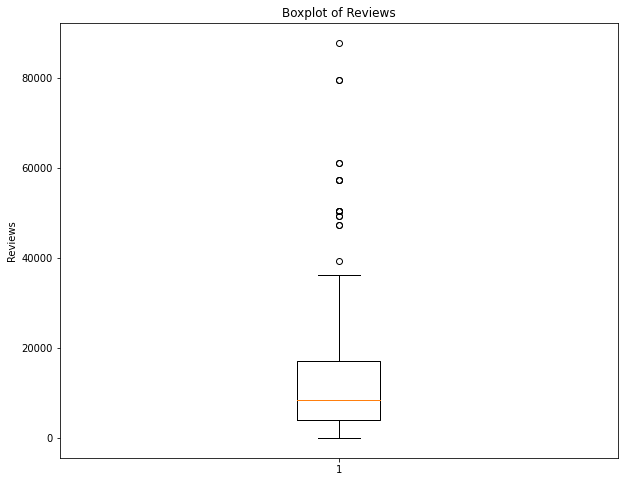

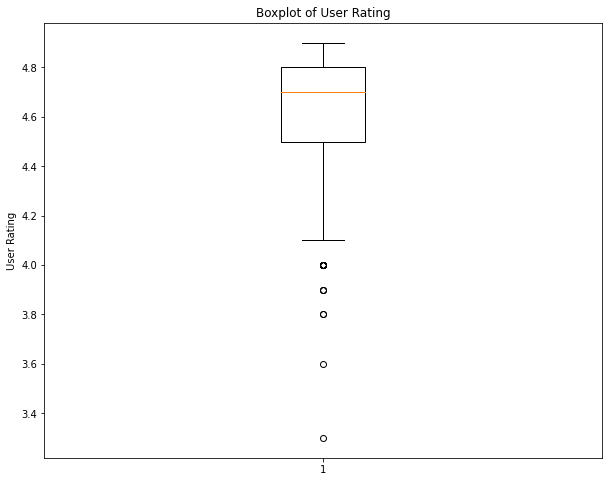

In [12]:
# Plot a box plots for numerical columns to visualise outliers
for column in columns_to_plot:
    plt.figure(figsize=(10,8))
    plt.boxplot(bst[column])
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)
    plt.show

7. What is the average price of amazon bestsellers over time

In [13]:
revenue = bst.pivot_table(index='Year', values='Price', aggfunc='mean')
sorted_revenue = revenue.sort_values(by='Year')
sorted_revenue

,Price
Year,
2009,15.40
2010,13.48
2011,15.10
2012,15.30
2013,14.60
2014,14.64
2015,10.42
2016,13.18
2017,11.38


<Figure size 720x576 with 0 Axes>

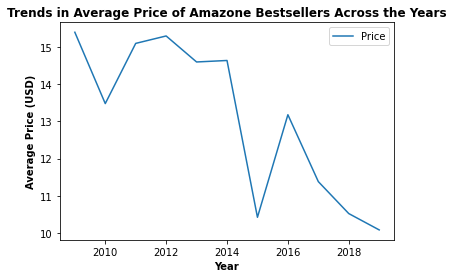

In [14]:
plt.figure(figsize=(10,8))
sorted_revenue.plot(kind='line')
plt.xlabel('Year', weight='bold')
plt.ylabel('Average Price (USD)', weight='bold')
plt.title('Trends in Average Price of Amazone Bestsellers Across the Years', weight='bold')
plt.show()

8. Is there any correlation between user rating and average price of amazon bestsellers.

In [15]:
grouped = bst.groupby('Year').agg({'Price':'mean', 'User Rating':'mean'})
grouped['User Rating'] = grouped['User Rating'].apply(lambda x: round(x,2))
grouped

,Price,User Rating
Year,,
2009,15.40,4.58
2010,13.48,4.56
2011,15.10,4.56
2012,15.30,4.53
2013,14.60,4.55
2014,14.64,4.62
2015,10.42,4.65
2016,13.18,4.68
2017,11.38,4.66


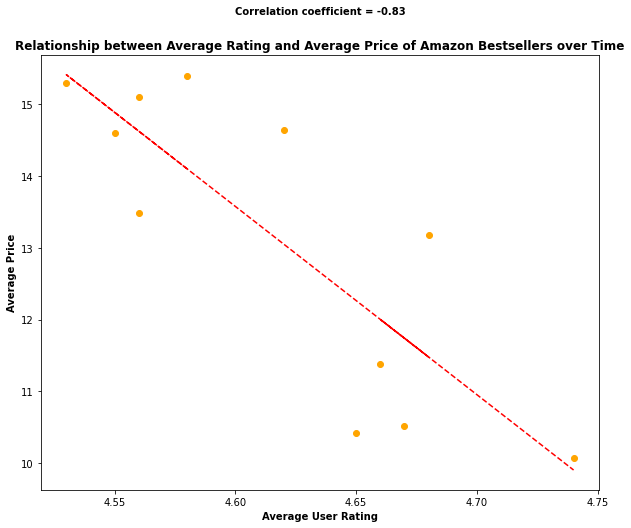

In [16]:
x = grouped['User Rating']
y = grouped['Price']

plt.figure(figsize=(10,8))
plt.scatter(x, y, color='orange')
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), 'r--')
corr_coef = np.corrcoef(x, y)[1, 0]


plt.xlabel('Average User Rating', weight='bold')
plt.ylabel('Average Price', weight='bold')
plt.title('Relationship between Average Rating and Average Price of Amazon Bestsellers over Time', weight='bold')
plt.text(0.5, 1.1, f"Correlation coefficient = {corr_coef:.2f}", ha='center', va='center', weight='bold', transform=plt.gca().transAxes)
plt.show()

9. Trend of total user engagement across the years.

In [17]:
user_engagement = bst.pivot_table(index='Year', values='Reviews', aggfunc='sum')
sorted_user_engagement = user_engagement.sort_values(by='Year')
sorted_user_engagement

,Reviews
Year,
2009,235506
2010,273981
2011,405041
2012,654546
2013,654907
2014,792997
2015,711669
2016,709800
2017,644420


<Figure size 720x576 with 0 Axes>

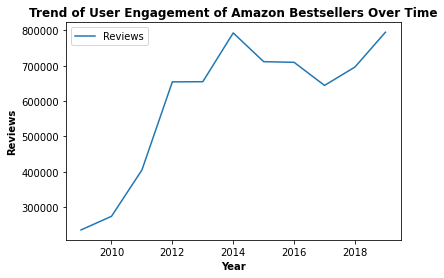

In [18]:
plt.figure(figsize=(10,8))
sorted_user_engagement.plot(kind='line')
plt.xlabel('Year', weight='bold')
plt.ylabel('Reviews', weight='bold')
plt.title('Trend of User Engagement of Amazon Bestsellers Over Time', weight='bold')
plt.show()

10. Is there any relationship between average user rating, average price and user_engagement over time

In [19]:
grouped_2 = bst.groupby('Year').agg({'Price':'mean', 'User Rating':'mean', 'Reviews':'sum'})
grouped_2['User Rating'] = grouped['User Rating'].apply(lambda x: round(x,2))
grouped_2

,Price,User Rating,Reviews
Year,,,
2009,15.40,4.58,235506
2010,13.48,4.56,273981
2011,15.10,4.56,405041
2012,15.30,4.53,654546
2013,14.60,4.55,654907
2014,14.64,4.62,792997
2015,10.42,4.65,711669
2016,13.18,4.68,709800
2017,11.38,4.66,644420


c:\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Relationship between Average User Ratings, Average Price and User Engagement over Time')

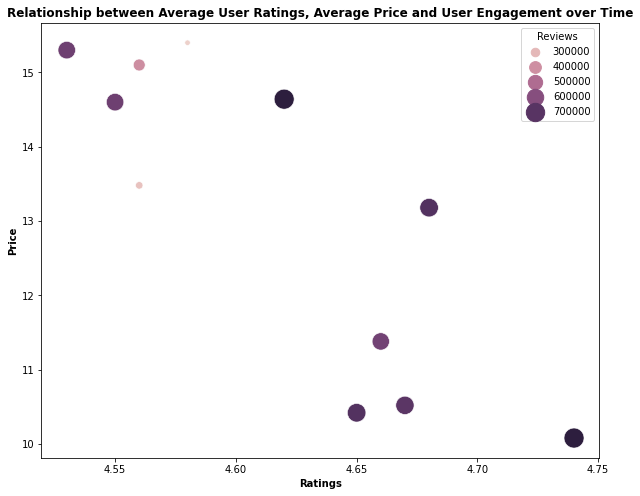

In [23]:
x = grouped_2['User Rating']
y = grouped_2['Price']
z = grouped_2['Reviews']

plt.figure(figsize=(10,8))
sns.scatterplot(x, y, z, size=z, sizes=(30,400))

plt.xlabel('Ratings', weight='bold')
plt.ylabel('Price', weight='bold')
plt.title('Relationship between Average User Ratings, Average Price and User Engagement over Time', weight='bold')